## prepare fault receivers 


Loading XDMF file: /Users/DuoL/Documents/NSHM/Central/Joint3/jp3f/jp3f-fault.xdmf

Mesh statistics:
  Total vertices: 243159
  Total triangular elements: 81053
  Converted z-coordinates from meters to kilometers
  Depth range: -29.94 to -0.06 km

Filtering at depth z = -7.0 ± 0.1 km:
  Elements at target depth: 304
  Creating grid: 1714 x 1333 bins
  Populated bins: 303
  Selected elements: 303

Applying lateral spacing of 50.0 km:
  Selected elements: 303
  Spatial extent:
    X: 1715933.00 to 1801630.29 km
    Y: 5389402.00 to 5456026.67 km
Selected 303 of 304 elements

Figure saved to: centroids_plot.png


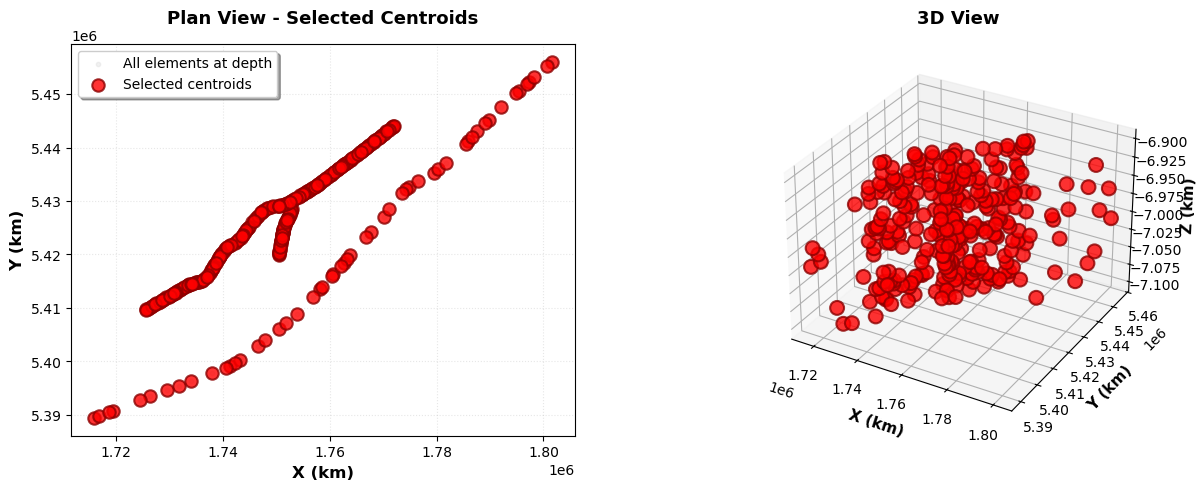

In [14]:
# In a notebook cell:
import DyPltFunc.extract_centroids_xdmf, importlib
importlib.reload(DyPltFunc.extract_centroids_xdmf)

from DyPltFunc.extract_centroids_xdmf import extract_triangle_centroids, plot_centroids

modelname='/Users/DuoL/Documents/NSHM/Central/Joint3/jp3f/jp3f-fault.xdmf'
# Extract centroids at z=-10 km with 10 km spacing
results = extract_triangle_centroids(
    modelname,
    target_depth=-7.0,      # 10 km below surface
    lateral_spacing=50.0,    # 10 km spacing between points
    depth_tolerance=0.1   # ±0.5 km depth tolerance
)

# Access results
centroids = results['centroids']           # Selected centroid coordinates (N, 3)
element_ids = results['element_ids']       # Original element indices
fault_tags = results['fault-tag']
print(f"Selected {results['n_selected']} of {results['n_total']} elements")

# Visualize
plot_centroids(results, save_path='centroids_plot.png')


In [15]:
import pandas as pd



df_select=pd.DataFrame({
    'ele': element_ids,
    'x_coord': centroids[:,0],
    'y_coord': centroids[:,1],
    'z_coord': centroids[:,2],
    'fault-tag': fault_tags,
    
})

df_select.sort_values(by='x_coord')

df_select.to_csv('jp3f_slab.csv',index=True)

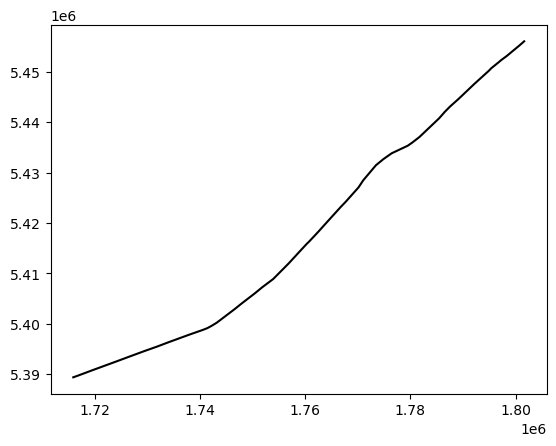

In [23]:
import matplotlib.pyplot as plt

df_wai = df_select[df_select['fault-tag']==3]

df_wai_sorted = df_wai.sort_values(by='y_coord')

plt.figure()
plt.plot(df_wai_sorted['x_coord'],df_wai_sorted['y_coord'],'-k',label='xy')
plt.show()

In [24]:
# print(df_wai)